# Support Vector Machines and Random Forest 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
def create_dataset1():
    X,y = make_blobs(n_samples = 90, centers = 2, random_state = 3)
    return X, y

In [3]:
def create_dataset2():
    # Create dataset
    np.random.seed(42)  # always the same data generation
    X = np.stack((np.random.normal(size=100),np.random.normal(size=100)),axis = 1)
    y = np.array([1 if (xy[0]**2+xy[1]**2)**0.5 <0.5 else 0 for xy in X])
    
    return X, y

In [4]:
def plot_dataset(X, y):
    # plot data
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker = '*', s=30)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker = 'v', s=30)
    plt.show()

## 1) Support Vector Machines

In [5]:
def plot_svm_vectors(clf):
    plt.figure(figsize=(10,10))

    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker = '*', s=30)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker = 'v', s=30)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(
        XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
    )
    # plot support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors='none',
        edgecolors="k",
    )
    plt.title("Distance to hyperplane and support vectors")
    plt.ylabel('Feature y')
    plt.xlabel('Feature x')
    plt.show()

### 1.1) Use a linear kernel

In [6]:
# Use sklearn and its svm implementation to fit the data into the model

# your support vector machine from sklearn - code here
clf = svm.SVC(kernel='linear', C = 1)

#### 1.1.1) Dataset 1

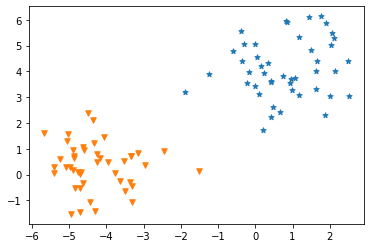

In [7]:
X, y = create_dataset1()
plot_dataset(X, y)

In [8]:
# use your SVM (fit method) from above with dataset 1 - write code here!
clf.fit(X,y)

SVC(C=1, kernel='linear')

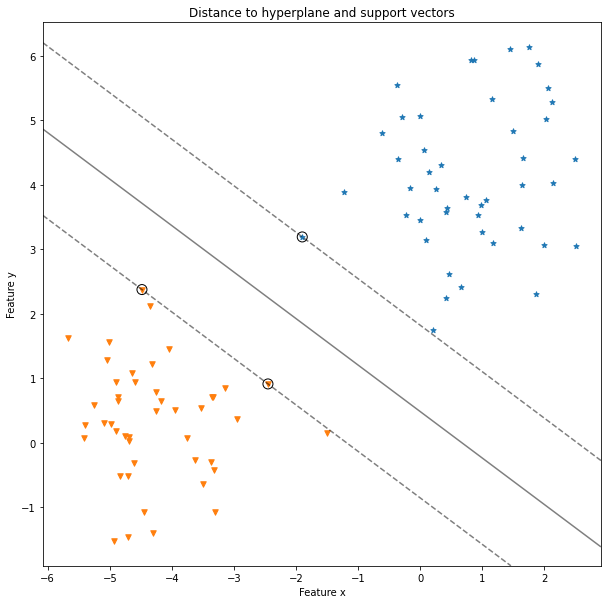

In [9]:
# we plot the decision boundaries of your svm
# what do you think how good is your model based on this visualization?

plot_svm_vectors(clf)

#### 1.1.2) Dataset 2

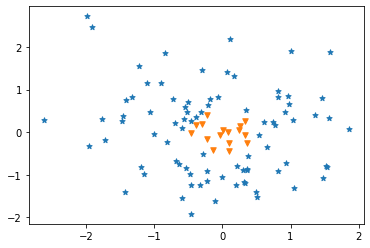

In [10]:
X, y = create_dataset2()
plot_dataset(X, y)

In [11]:
# use your SVM (fit method) from above with dataset 2 - write code here!
clf.fit(X,y)

SVC(C=1, kernel='linear')

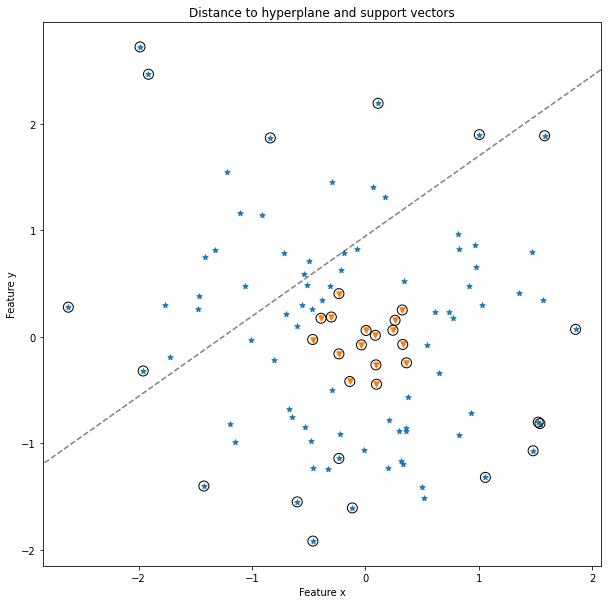

In [12]:
# we plot the decision boundaries of your svm
# what do you think how good is your model based on this visualization?

plot_svm_vectors(clf)

### 1.2) Use a polynomial kernel

In [13]:
# polynomial kernel (update code below)
# what is an appropriate value of C?
clf = svm.SVC(C = 1000)

#### 1.2.1) Dataset 1

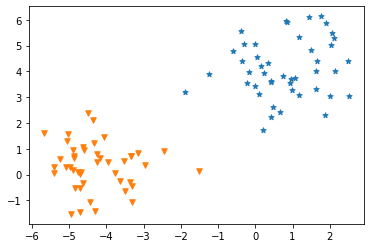

In [14]:
X, y = create_dataset1()
plot_dataset(X, y)

In [15]:
# use your SVM (fit method) from above with dataset 1 - write code here!
clf.fit(X,y)

SVC(C=1000)

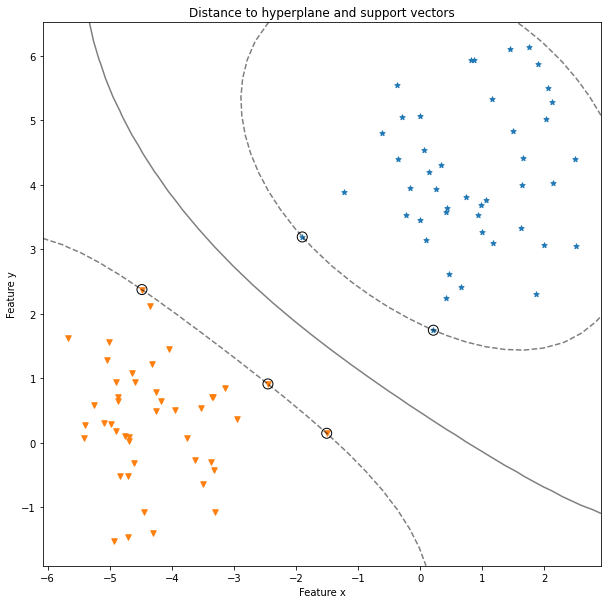

In [16]:
# we plot the decision boundaries of your svm
# what do you think how good is your model based on this visualization?

plot_svm_vectors(clf)

#### 1.2.2) Dataset 2

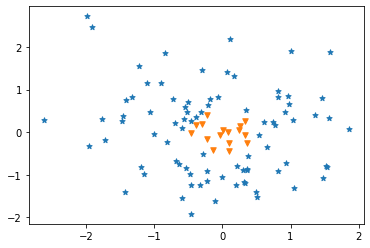

In [17]:
X, y = create_dataset2()
plot_dataset(X, y)

In [18]:
# use your SVM (fit method) from above with dataset 1 - write code here!
clf.fit(X,y)

SVC(C=1000)

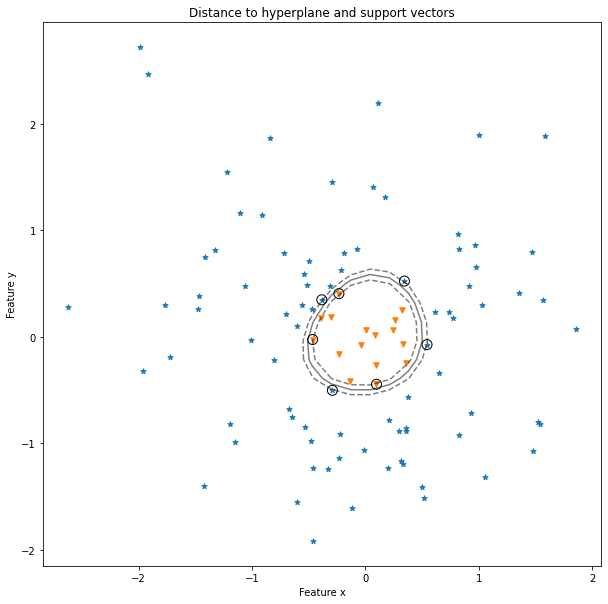

In [19]:
# we plot the decision boundaries of your svm
# what do you think how good is your model based on this visualization?

plot_svm_vectors(clf)

## 2) Random Forest Classification

In [20]:
def calculate_accuracy(y, y_pred):
    res = y == y_pred
    return np.mean(res)

In [21]:
# Use sklearn and its RandomForestClassifier implementation to fit the data into the model

# your RandomForestClassifier from sklearn - code here
# Start from a low number of estimators before you increase it step by step to see the prediction accuracy differences
clf = RandomForestClassifier(n_estimators=1)

### 2.1) Dataset 1

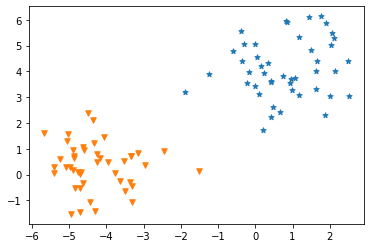

In [22]:
X, y = create_dataset1()
plot_dataset(X, y)

In [23]:
# We split the data into training and test data first
# dataset split into 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [24]:
# use your classifier (fit method) with dataset 1 (train)

clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1)

In [25]:
# predict the values with the test dataset of dataset 1
# calculate the accuracy (use the method "calculate_accuracy" from above)

y_pred = clf.predict(X_test)
calculate_accuracy(y_test, y_pred)

1.0

### 2.2) Dataset 2

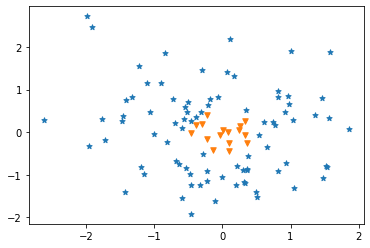

In [26]:
X, y = create_dataset2()
plot_dataset(X, y)

In [27]:
# We split the data into training and test data first
# dataset split into 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [28]:
# use your classifier (fit method) with dataset 1 (train)

clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1)

In [29]:
# predict the values with the test dataset of dataset 1
# calculate the accuracy (use the method "calculate_accuracy" from above)

y_pred = clf.predict(X_test)
calculate_accuracy(y_test, y_pred)

0.95